In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,NaN,NaN,900.0,0,0,0,0,0,1,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,...,NaN,NaN,650.0,0,0,0,0,0,0,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,NaN,595.0,0,0,0,0,0,1,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,...,NaN,NaN,1200.0,1,0,0,0,0,1,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,...,1345.0,NaN,NaN,1,0,0,0,0,1,0.0


In [6]:
df.shape

(3664, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3664 non-null   object 
 1   society              3663 non-null   object 
 2   sector               3664 non-null   object 
 3   price                3664 non-null   float64
 4   price_per_sqft       3664 non-null   float64
 5   area                 3664 non-null   float64
 6   areaWithType         3664 non-null   object 
 7   bedRoom              3664 non-null   int64  
 8   bathroom             3664 non-null   int64  
 9   balcony              3664 non-null   object 
 10  floorNum             3645 non-null   float64
 11  facing               2622 non-null   object 
 12  agePossession        3664 non-null   object 
 13  super_built_up_area  1876 non-null   float64
 14  built_up_area        1676 non-null   float64
 15  carpet_area          1871 non-null   f

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,NaN,NaN,900.0,0,0,0,0,0,1,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,...,NaN,NaN,650.0,0,0,0,0,0,0,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,NaN,595.0,0,0,0,0,0,1,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,...,NaN,NaN,1200.0,1,0,0,0,0,1,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,...,1345.0,NaN,NaN,1,0,0,0,0,1,0.0


# Property Type

<Axes: >

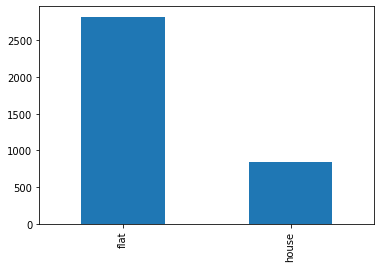

In [11]:
df['property_type'].value_counts().plot(kind='bar',)

Observations

Flats are in majority(75 percent) and there are less number of houses(~25 percent)

No missing values

# Society

In [12]:
df['society'].value_counts().shape

(674,)

In [13]:
df['society'].value_counts()

independent                             481
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
u block dlf phase 3 road no 21            1
sbr minda sec 1 imt manesar               1
uphar lakshya homes                       1
signature global infinity mall            1
the cocoon                                1
Name: society, Length: 674, dtype: int64

In [14]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023570
ss the leaf                             0.046512
dlf new town heights                    0.059711
shapoorji pallonji joyville gurugram    0.072910
signature global park                   0.083909
                                          ...   
indiabulls enigma                       0.490572
puri emerald bay                        0.494657
dlf the primus                          0.498743
ansal heights 86                        0.502828
ireo the corridors                      0.506600
Name: society, Length: 75, dtype: float64

In [15]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 272,
 'Very Low (1)': 307}

<Axes: >

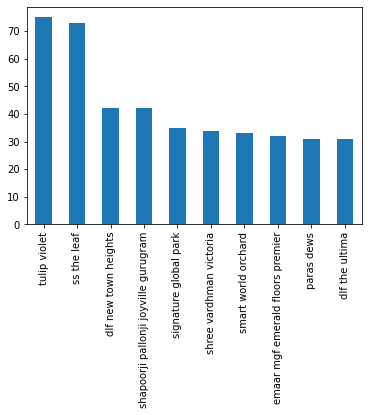

In [16]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [17]:
df['society'].isnull().sum()

1

In [18]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2589,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,1,103.0


Observations

Around 13% properties comes under independent tag.

There are 675 societies.

The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies

Very High (>100): Only 1 society has more than 100 listings.

High (50-100): 2 societies have between 50 to 100 listings.

Average (10-49): 92 societies fall in this range with 10 to 49 listings each.

Low (2-9): 273 societies have between 2 to 9 listings.

Very Low (1): A significant number, 308 societies, have only 1 listing.

1 missing value

# Sectore

In [19]:
# unique sectors
df['sector'].value_counts().shape

(115,)

<Axes: >

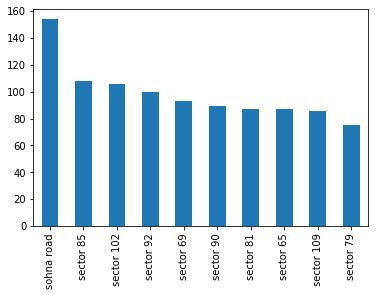

In [20]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [21]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 24,
 'Average (10-49)': 63,
 'Low (2-9)': 24,
 'Very Low (1)': 1}

# Observations

There are a total of 115 unique sectors in the dataset.

Frequency distribution of sectors:

Very High (>100): 3 sectors have more than 100 listings.

High (50-100): 25 sectors have between 50 to 100 listings.

Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.

Low (2-9): 16 sectors have between 2 to 9 listings.

Very Low (1): Interestingly, there are no sectors with only 1 listing.

# Price

In [22]:
df['price'].isnull().sum()

0

In [23]:
df['price'].describe()

count    3664.000000
mean        2.533248
std         2.979058
min         0.070000
25%         0.950000
50%         1.525000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

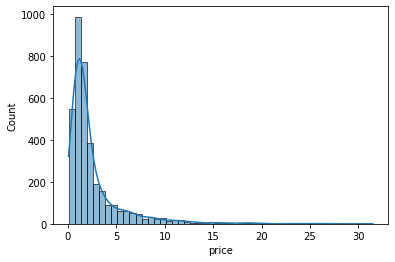

In [24]:
sns.histplot(df['price'], kde=True, bins=50)

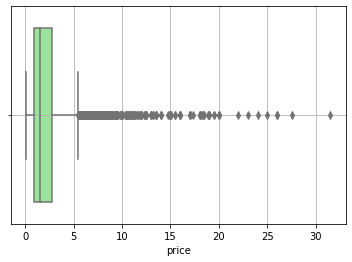

In [25]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

Descriptive Statistics:

Count: There are 3,660 non-missing price entries.

Mean Price: The average price is approximately 2.53 crores.

Median Price: The median (or 50th percentile) price is 1.52 crores.

Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.

Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.

IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

Visualizations:


Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a 
few properties going beyond 10 crores.

Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above 

approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

Missing Values: There are 0 missing values in the price column.

In [26]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2811592590294376 14.95329398708748


Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [27]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.248
Name: price, dtype: float64

Quantile Analysis:

1% Quantile: Only 1% of properties are priced below 0.25 crores.

5% Quantile: 5% of properties are priced below 0.37 crores.

95% Quantile: 95% of properties are priced below 8.5 crores.

99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [28]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [29]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [30]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [31]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

Based on the IQR method, there are 425 properties considered as outliers.

These outliers have an average price of approximately 9.24 crores.

The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: >

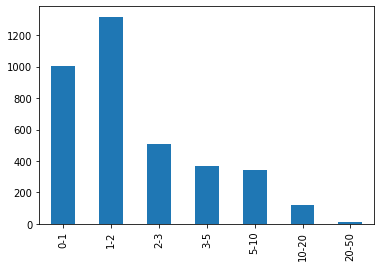

In [32]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.

There's a significant drop in the number of properties priced above "5 crores."

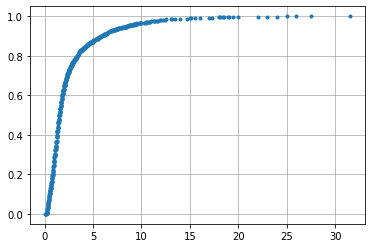

In [33]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

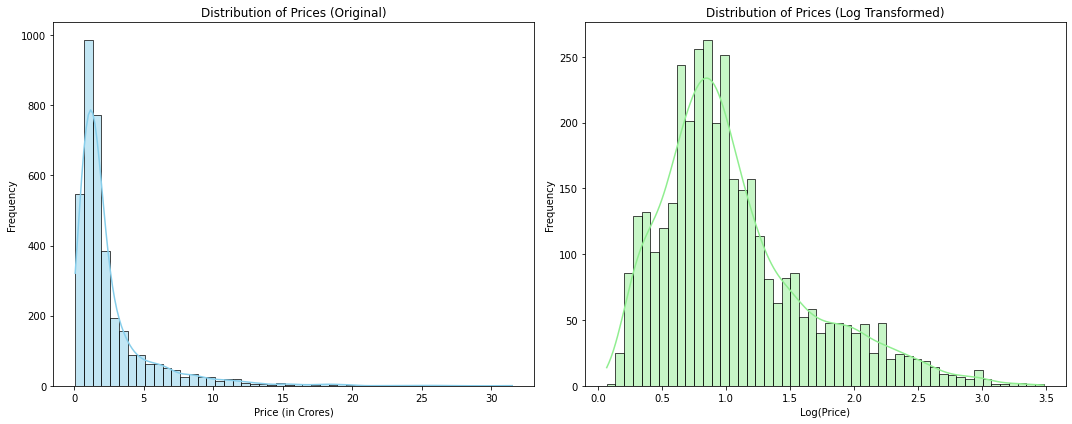

In [34]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [35]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740656509013653 0.9676010482364177


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


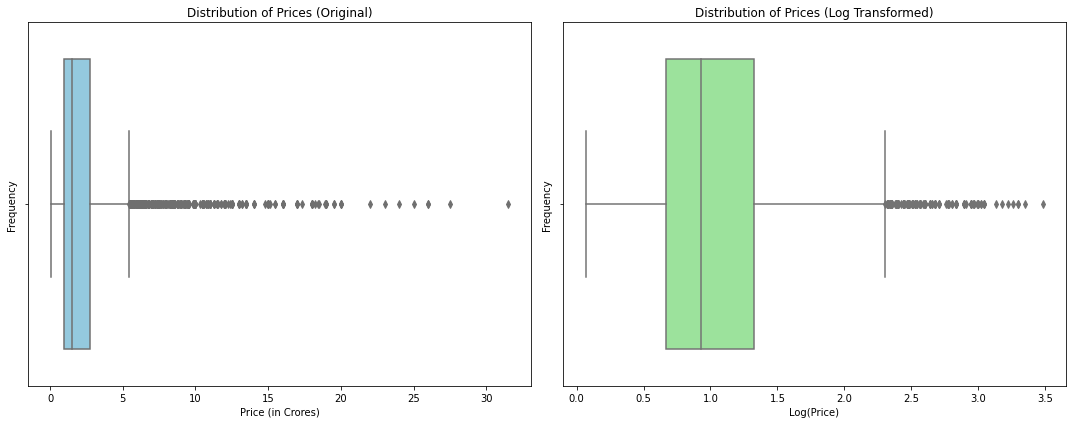

In [36]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Price_per_SQFT

In [37]:
df['price_per_sqft'].isnull().sum()

0

In [38]:
df['price_per_sqft'].describe()

count      3664.000000
mean      13895.281114
std       23197.757961
min           4.000000
25%        6818.000000
50%        9022.000000
75%       13888.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

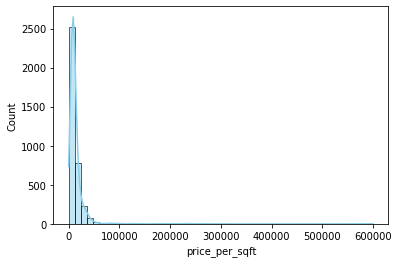

In [39]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='price_per_sqft'>

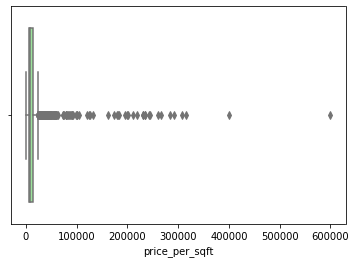

In [40]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

Observations

Potential Outliers

Right Skewed

0 missing values

# Bedroom


In [41]:
df['bedRoom'].isnull().sum()

0

<Axes: >

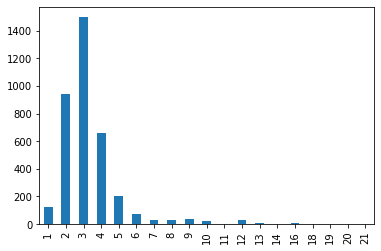

In [42]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

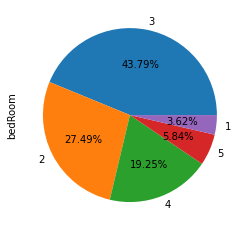

In [43]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# Bathroom 

In [44]:
df['bathroom'].isnull().sum()

0

<Axes: >

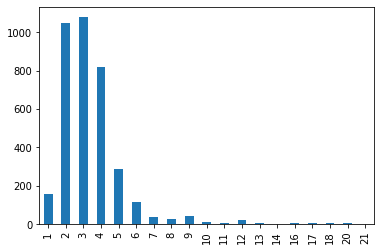

In [45]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

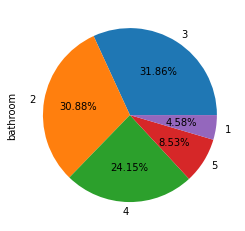

In [46]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# Balcony

In [47]:
df['balcony'].isnull().sum()

0

<Axes: >

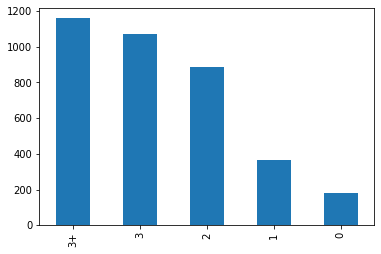

In [48]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

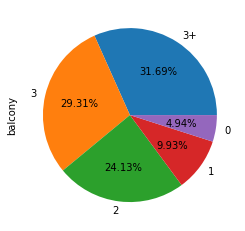

In [49]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [50]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,NaN,NaN,900.0,0,0,0,0,0,1,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,...,NaN,NaN,650.0,0,0,0,0,0,0,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,NaN,595.0,0,0,0,0,0,1,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,...,NaN,NaN,1200.0,1,0,0,0,0,1,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,...,1345.0,NaN,NaN,1,0,0,0,0,1,0.0


# Floor_No

In [51]:
df['floorNum'].isnull().sum()

19

In [52]:
df['floorNum'].describe()

count    3645.000000
mean        6.815364
std         6.024027
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

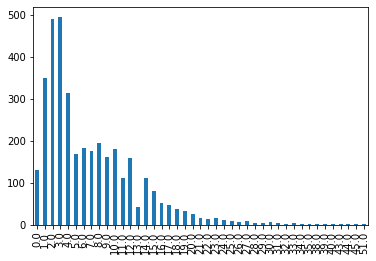

In [53]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='floorNum'>

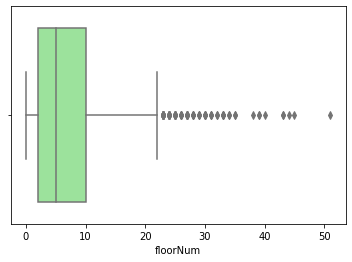

In [54]:
sns.boxplot(df['floorNum'], color='lightgreen')

The majority of the properties lie between the ground floor (0) and the 25th floor.

Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.

There are a few properties located at higher floors, but their frequency is much lower.

The box plot reveals that the majority of the properties are concentrated around the lower floors. The 
interquartile range (IQR) lies between approximately the 2nd and 10th floors.

Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# Facing 

In [55]:
df['facing'].isnull().sum()

1042

In [56]:
df['facing'].fillna('NA',inplace=True)

In [57]:
df['facing'].value_counts()

NA            1042
North-East     621
East           621
North          386
West           247
South          231
North-West     192
South-East     171
South-West     153
Name: facing, dtype: int64

# AgePossesion

In [58]:
df['agePossession'].isnull().sum()

0

In [59]:
df['agePossession'].value_counts()

Relatively New        1640
New Property           591
Moderately Old         558
Undefined              447
Old Property           302
Under Construction     126
Name: agePossession, dtype: int64

# Areas

In [60]:
# super built up area
df['super_built_up_area'].isnull().sum()

1788

In [61]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

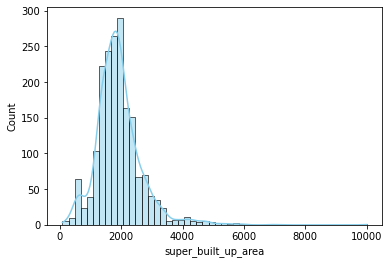

In [62]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='super_built_up_area'>

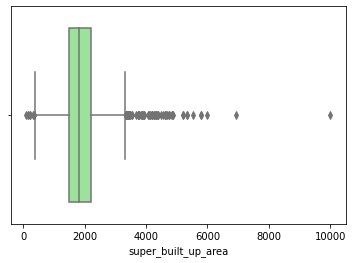

In [63]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.

There are a few properties with a significantly larger area, leading to a right-skewed distribution.

The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of 
the properties fall within this range.

There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [64]:
# built up area
df['built_up_area'].isnull().sum()

1988

In [65]:
df['built_up_area'].describe()

count      1676.000000
mean       2385.206461
std       18016.184325
min           2.000000
25%        1113.500000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

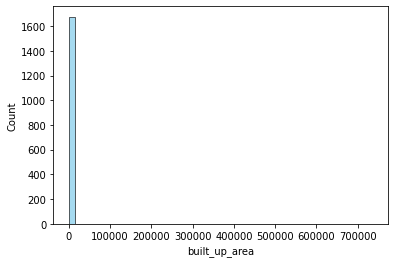

In [66]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='built_up_area'>

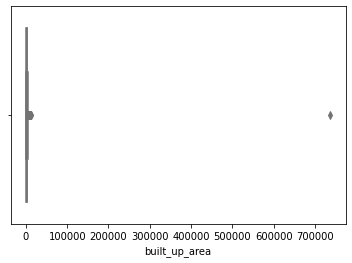

In [67]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.

There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.

The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.

The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. 

This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [68]:
# carpet area
df['carpet_area'].isnull().sum()

1793

In [69]:
df['carpet_area'].describe()

count      1871.000000
mean       2531.753542
std       22805.787173
min          15.000000
25%         845.000000
50%        1300.000000
75%        1790.500000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

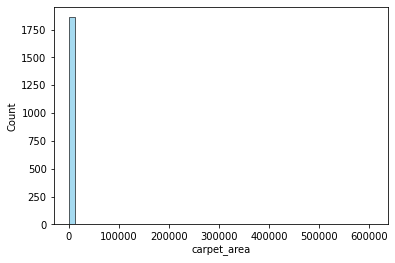

In [70]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='carpet_area'>

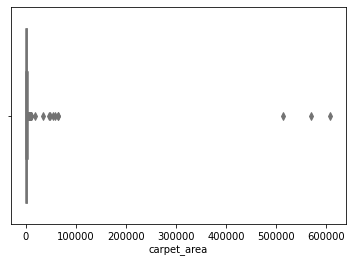

In [71]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

# Additional Room

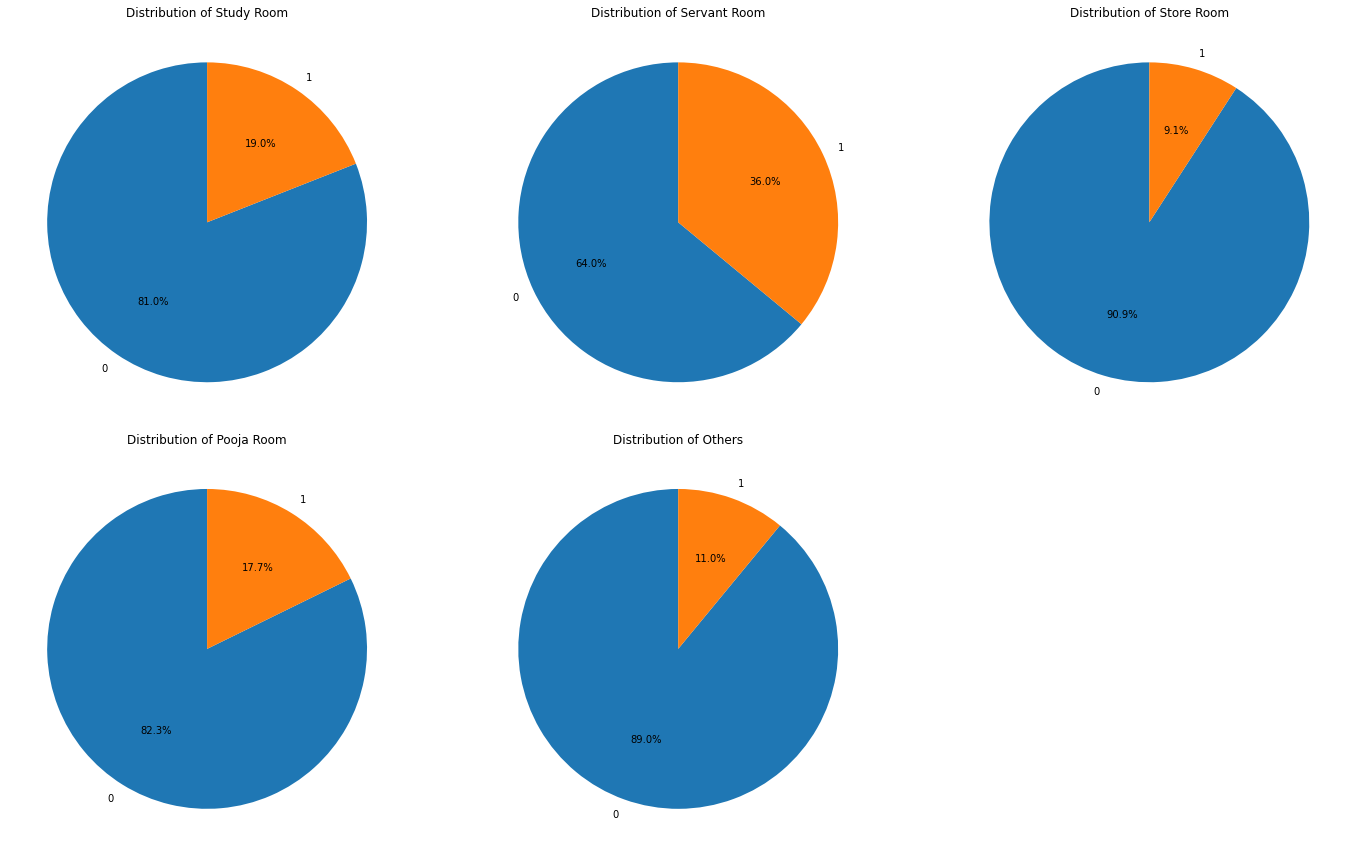

In [72]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Furnishing_Type

In [73]:
df['furnishing_type'].value_counts()

1    2406
0    1051
2     207
Name: furnishing_type, dtype: int64

<Axes: ylabel='furnishing_type'>

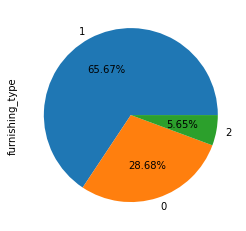

In [74]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# Luxrius+Score